In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.stats as stats
import numpy.random as random
import scipy.interpolate as interpol
import scipy.integrate as integrate

# Test case for today: log-normal data

Let's create $10^6$ values distributed as a log-normal: $x \sim e^{N(0,1)}$

In [3]:
data=exp(random.randn(100_000))

__In the below code box, plot a histogram of the array `data` as one figure (using `plt.figure()`) and a histogram of the log of the data as a second figure.  Use 100 bins for each plot.__

<function matplotlib.pyplot.show(close=None, block=None)>

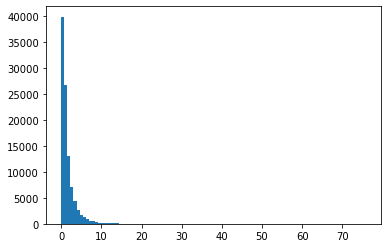

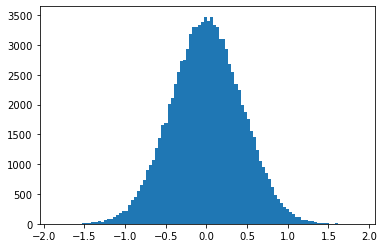

In [29]:
plt.figure(1)
plt.hist(data, bins=100)
plt.show
plt.figure(2)
plt.hist(log10(data), bins=100)
plt.show

Calculating the mean:

In [30]:
print(np.mean(data))
print( data.mean() )

1.6522210857584927
1.6522210857584927


Calculating the median:

In [31]:
print(np.median(data))

1.0009028853924398


Calculating the mode:

In [32]:
print(f'Unrounded: {stats.mode(data)}')

data_r = np.round(data,decimals=2)
print(f'Rounded: {stats.mode(data_r)}' )

Unrounded: ModeResult(mode=array([0.0137197]), count=array([1]))
Rounded: ModeResult(mode=array([0.45]), count=array([709]))


In [33]:
bins = np.linspace(-0.005,10.005,1002)
counts,edges=np.histogram(data,bins=bins)
whmax=np.argmax(counts)
mode=(edges[whmax]+edges[whmax+1])/2
print(mode)

0.45000000000000007


## Creating a mode function

Let's define a function which can calculate the mode for any binning we might choose at the time we run it:

In [34]:
def mode2(data,**kwargs):
# note: provide bins and (optionally) range keywords 
# as used in np.histogram to not use the
# defaults of np.histogram (10 bins, full range)
    counts,edges=np.histogram(data,**kwargs)
    whmax=np.argmax(counts)
    mode=(edges[whmax]+edges[whmax+1])/2
    print(mode)
    return(mode)

__Use the `mode2` function to calculate the mode for at least 3 different binnings of the data (differing in bin sizes).__  Since we used `**kwargs` we can include the `bins=` keyword within the `mode2` function call, and it gets passed to `np.histogram`.

In [38]:
bins1=100
bins2=200
bins3=300

mode2(data, bins=bins1)
mode2(data, bins=bins2)
mode2(data, bins=bins3)

0.39274789367682056
0.5822619928673209
0.3927478936768205


0.3927478936768205

# Calculating measures of scale

First, the standard deviation:


In [46]:
print( np.std(data),np.std(data,ddof=1) )
print( np.std(log(data)),np.std(log(data),ddof=1) )

2.157745867114065 2.1577566559243166
0.9996520197178881 0.9996570180154739


### Now, the mean absolute deviation.  

__Discuss with your group: why do these values agree or not with the standard deviation?__


In [43]:
normmeanabsdev = np.mean(np.abs(data-data.mean()))/0.7979
mnlog = np.mean(np.log(data) )
normmeanabsdev_log = np.mean(np.abs( np.log(data)-mnlog) )/0.7979

print(f'Normalized Mean Absolute Deviation: {normmeanabsdev:.5f}')
print(f'Normalized Mean Absolute Deviation of log(data): {normmeanabsdev_log:.5f}')

Normalized Mean Absolute Deviation: 1.58673
Normalized Mean Absolute Deviation of log(data): 0.99960


### Calculating the MAD:

__Discuss with your group: why do these values agree or not with the standard deviation?__


In [44]:
meddata=np.median(data)
normmad = np.median(np.abs(data-meddata))/0.6745
normmad_log = np.median(abs(np.log(data)-np.log(meddata)))/0.6745


print(f'Normalized Median Absolute Deviation: {normmad:.5f}')
print(f'Normalized Median Absolute Deviation of log(data): {normmad_log:.5f}')

Normalized Median Absolute Deviation: 0.88515
Normalized Median Absolute Deviation of log(data): 1.00017


### Calculating the IQR:

__Discuss with your group: why do these values agree or not with the standard deviation?__

In [45]:
d25,d75 = np.percentile(data,[25,75])
normiqr = (d75-d25)/1.349
normiqr_log = (np.log(d75)-np.log(d25))/1.349


print(f'Normalized IQR: {normiqr:.5f}')
print(f'Normalized IQR of log(data): {normiqr_log:.5f}')

Normalized IQR: 1.07937
Normalized IQR of log(data): 1.00023


# Results when averaging data together

(array([1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 6.000e+00, 5.000e+00,
        8.000e+00, 1.500e+01, 1.300e+01, 1.700e+01, 3.100e+01, 3.200e+01,
        5.500e+01, 6.600e+01, 7.800e+01, 8.700e+01, 1.350e+02, 1.440e+02,
        1.760e+02, 2.570e+02, 2.840e+02, 3.480e+02, 4.000e+02, 4.550e+02,
        5.800e+02, 6.520e+02, 7.610e+02, 8.730e+02, 1.031e+03, 1.198e+03,
        1.373e+03, 1.452e+03, 1.630e+03, 1.907e+03, 2.022e+03, 2.239e+03,
        2.344e+03, 2.512e+03, 2.683e+03, 2.910e+03, 2.992e+03, 3.191e+03,
        3.232e+03, 3.349e+03, 3.373e+03, 3.451e+03, 3.517e+03, 3.453e+03,
        3.423e+03, 3.410e+03, 3.373e+03, 3.102e+03, 3.034e+03, 2.881e+03,
        2.748e+03, 2.482e+03, 2.392e+03, 2.177e+03, 1.989e+03, 1.784e+03,
        1.592e+03, 1.479e+03, 1.313e+03, 1.171e+03, 1.022e+03, 8.570e+02,
        7.550e+02, 6.060e+02, 5.490e+02, 4.810e+02, 3.430e+02, 3.290e+02,
        2.860e+02, 2.360e+02, 1.740e+0

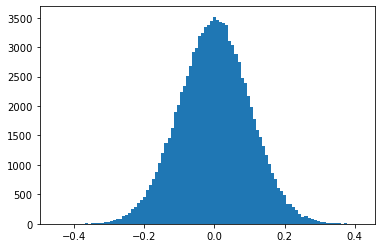

In [5]:
nsims=int(1E5)
navg=100
data=random.randn(nsims,navg)

# average each set of navg values
means=np.mean(data,axis=1)

plt.hist(means,bins = 100)

- __Using the below code block, plot a histogram of the distribution of the means from each simulation, with binsize 0.01, over the range from -2 to +2 (what should you set the `bins` and `range` keywords to be for that?)__

- __Determine the standard deviation of the array of means__

0.0999884633443017


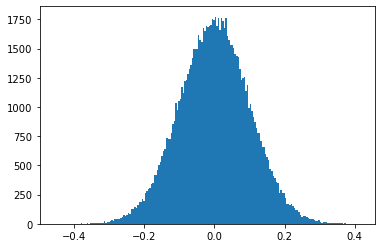

In [6]:
plt.hist(means, bins = 200)
sigma = np.std(means)
print(sigma)

- __Now, in the above code box, create a second set of simulations with `navg` = 9.  Plot the histogram of results from these simulations on top of the histogram for averaging 100 measurements.__

__Discuss with your group: How do you explain the differences between the results (both qualitatively and quantitatively)? How does the scatter of the means scale with `navg`?__

(array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 9.000e+00, 6.000e+00, 4.000e+00, 9.000e+00,
        2.100e+01, 1.700e+01, 2.600e+01, 3.600e+01, 6.500e+01, 7.600e+01,
        8.300e+01, 8.800e+01, 1.230e+02, 1.520e+02, 1.860e+02, 2.310e+02,
        3.050e+02, 3.390e+02, 4.230e+02, 5.170e+02, 6.030e+02, 6.880e+02,
        7.620e+02, 9.370e+02, 1.018e+03, 1.210e+03, 1.314e+03, 1.488e+03,
        1.712e+03, 1.876e+03, 2.068e+03, 2.374e+03, 2.476e+03, 2.551e+03,
        2.790e+03, 2.911e+03, 2.998e+03, 3.137e+03, 3.367e+03, 3.350e+03,
        3.476e+03, 3.417e+03, 3.451e+03, 3.394e+03, 3.432e+03, 3.326e+03,
        3.142e+03, 3.034e+03, 2.927e+03, 2.915e+03, 2.667e+03, 2.627e+03,
        2.328e+03, 2.110e+03, 1.923e+03, 1.772e+03, 1.568e+03, 1.471e+03,
        1.307e+03, 1.081e+03, 1.011e+03, 8.180e+02, 7.320e+02, 6.850e+02,
        5.670e+02, 4.710e+02, 3.700e+02, 3.200e+02, 2.650e+02, 1.980e+02,
        2.040e+02, 1.390e+02, 1.050e+0

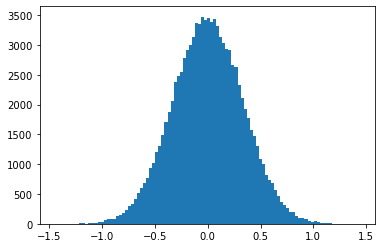

In [7]:
nsims=int(1E5)
navg=9
data=random.randn(nsims,navg)

# average each set of navg values
means=np.mean(data,axis=1)

plt.hist(means,bins = 100)